<a href="https://colab.research.google.com/github/PMartey/Lung-Cancer-Prediction/blob/main/D_S_M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CMAT 651 – Topics in Mathematics: Data Science
### Mini-Course Project II
### Group Three
#### Names: Pamela Martey, Larry Samuels, and  LaTabitha S. King  
#### Instructor: Dr. Walker


# Load the data set

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# import the data set
lung_cancer_data = pd.read_csv('/content/survey lung cancer.csv')
# Show the columns and data types
lung_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
# Look at the first 5 rows of the data
lung_cancer_data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
# change the lungcancer column to numeric
# create dictionary for LUNG_CANCER  where yes is 2 and no is 1
# create dictionary for Gender where M is 1 and F is 2
lung_cancer_data['LUNG_CANCER_numeric'] = lung_cancer_data['LUNG_CANCER']
lung_cancer_data['Gender_Numeric'] = lung_cancer_data['GENDER']
dict_lung_cancer = {"LUNG_CANCER_numeric": {"YES": 1,
                                  "NO": 0 },
                    'Gender_Numeric':{"M": 1,
                                      "F": 2}}
lung_cancer_data.replace(dict_lung_cancer, inplace=True)
lung_cancer_data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,LUNG_CANCER_numeric,Gender_Numeric
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,1,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,1,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,0,2
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,0,1
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,0,2


In [ ]:
#displaying the cols to see if we were able to add the lung_cancer_numeric
lung_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

# Correlation Matrix

In [ ]:
#Create a dataset of all numeric columns to avoid error
lung_cancer_data_numeric = lung_cancer_data.select_dtypes(include=['int64'])
lung_cancer_data_numeric.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER_numeric,Gender_Numeric
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,2
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,2


In [ ]:
#the code in the block creates a correlation matrix of the numerical data
corr = lung_cancer_data_numeric.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER_numeric,Gender_Numeric
AGE,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104,0.089465,-0.021306
SMOKING,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117,0.058179,-0.036277
YELLOW_FINGERS,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829,0.181339,0.212959
ANXIETY,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634,0.144947,0.152127
PEER_PRESSURE,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828,0.186388,0.275564
CHRONIC DISEASE,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938,0.110891,0.204606
FATIGUE,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832,0.150673,0.083560
ALLERGY,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433,0.327766,-0.154251
WHEEZING,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640,0.249300,-0.141207
ALCOHOL CONSUMING,0.058985,-0.050623,-0.289025,-0.165750,-0.159973,0.002150,-0.191377,0.344339,0.265659,1.000000,0.202720,-0.179416,-0.009294,0.331226,0.288533,-0.454268


In [ ]:
# Viewing just these three columns
lung_cancer_data[['AGE', 'ANXIETY', 'YELLOW_FINGERS']]

,AGE,ANXIETY,YELLOW_FINGERS
0,69,2,2
1,74,1,1
2,59,1,1
3,63,2,2
4,63,1,2
...,...,...,...
304,56,1,1
305,70,1,1
306,58,1,1
307,67,2,1


In [ ]:
# Cross tab of age with anxiety without binning
CROSSTAB01 = pd.crosstab(lung_cancer_data['ANXIETY'],lung_cancer_data['AGE'])
CROSSTAB01

AGE,21,38,39,44,46,47,48,49,51,52,...,72,73,74,75,76,77,78,79,81,87
ANXIETY,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,0,4,1,2,3,3,...,5,2,4,3,2,4,1,1,1,1
2,0,0,0,1,1,0,1,1,5,1,...,5,2,2,2,2,5,1,0,1,0


# Histograms for our Exploratory Data Analysis

## Histogram of Age with Anxiety overlay

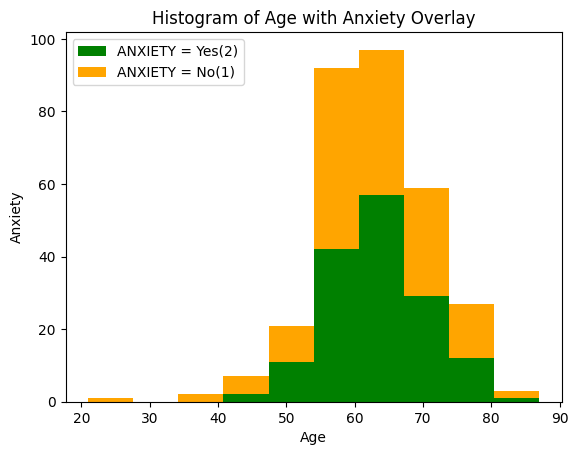

In [ ]:
# Creating histogram of age with anxiety overlay
lc_age_y = lung_cancer_data[lung_cancer_data.ANXIETY == 2]['AGE']
lc_age_n = lung_cancer_data[lung_cancer_data.ANXIETY == 1]['AGE']
plt.hist([lc_age_y, lc_age_n], bins = 10, stacked = True, color=['green','orange'])
plt.legend(['ANXIETY = Yes(2)', 'ANXIETY = No(1)'])
plt.title('Histogram of Age with Anxiety Overlay')
plt.xlabel('Age')
plt.ylabel('Anxiety')
plt.show()

<ipython-input-11-a27a4ffa7a96>:7: RuntimeWarning: invalid value encountered in divide
  n_norm = n_table/n_table.sum(axis=1)[:,None]


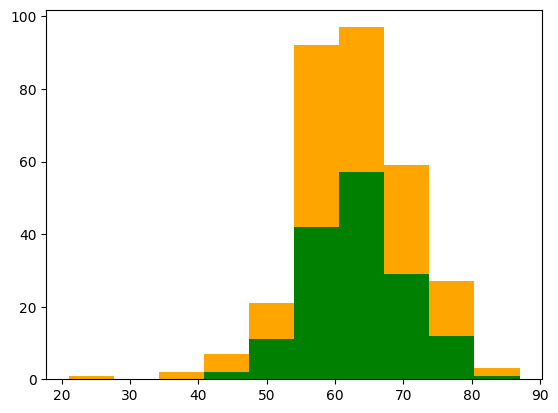

In [ ]:
# Save pieces of information from the histogram.
(n,bins,patches) = plt.hist([lc_age_y, lc_age_n], bins = 10, stacked = True, color=['green','orange'])

#create a two-column matrix where each column's entries hold the heights
n_table = np.column_stack((n[0],n[1]))
# each row in n_norm sums to one and cloumns within each row give the proportion fo that variable that makes up the row
n_norm = n_table/n_table.sum(axis=1)[:,None]

# Each row in ourbins gives the upper and lower bound of each bin.

ourbins = np.column_stack((bins[0:10],bins[1:11]))

## Normalize histogram of Age with Anxiety overlay

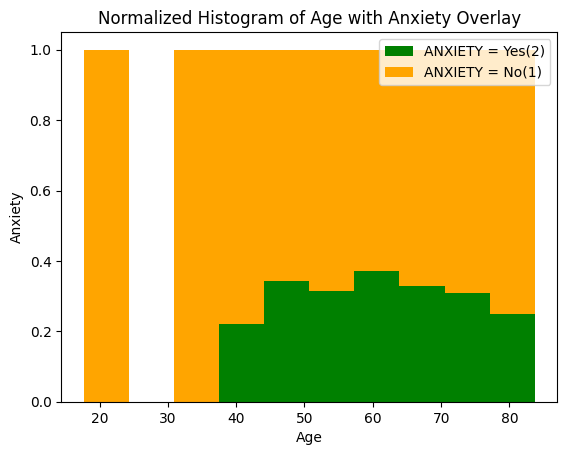

In [ ]:
# plot the normalized histogram for the "age" and 'anxiety' variables
p1 = plt.bar(ourbins[:,0],n_norm[:,0],width=ourbins[:,1]-ourbins[:,0],color='green')
p2 = plt.bar(ourbins[:,0],n_norm[:,1],width=ourbins[:,1]-ourbins[:,0],color='orange',bottom=n_norm[:,0])
plt.legend((p1[0], p2[0]), ('ANXIETY = Yes(2)', 'ANXIETY = No(1)'))
plt.title('Normalized Histogram of Age with Anxiety Overlay')
plt.xlabel('Age')
plt.ylabel('Anxiety')
plt.show()

The Highest proportion ofpeople who are anxious is between the ages of 45-65  
People below 45 do not have a high proportion for saying "yes" to anxiety.

## Binning Processing

In [ ]:

# a new categorical variable,age_binned, using the cutoff points identified

lung_cancer_data['Age_Binned'] = pd.cut(x= lung_cancer_data['AGE'], bins = [0,45,65.01,100], labels = ['Young(less than 45)', 'Middle(45 to 65)', 'Old(above 65)'], right = False)


## Contingency table of Age_binned with Anxiety

In [ ]:
# creating a contingency table of age_binned with anxiety
CROSSTAB02 = pd.crosstab(lung_cancer_data['ANXIETY'],lung_cancer_data['Age_Binned'])
CROSSTAB02

Age_Binned,Young(less than 45),Middle(45 to 65),Old(above 65)
ANXIETY,,,
1,4,98,53
2,1,100,53


In [ ]:
# Contingency table  of age_binned with anxiety with column percentages
round(CROSSTAB02.div(CROSSTAB02.sum(0).astype(float), axis=1)*100,3)

Age_Binned,Young(less than 45),Middle(45 to 65),Old(above 65)
ANXIETY,,,
1,80.0,49.495,50.0
2,20.0,50.505,50.0


## Histogram of Age with Smoking overlay

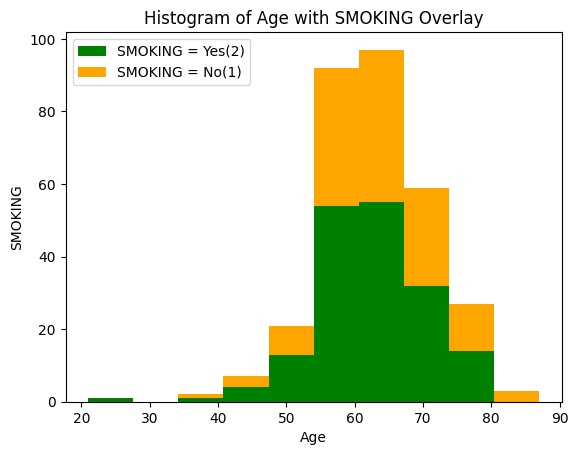

In [ ]:
# Creating histogram of age with smoking overlay
lc_age_y1 = lung_cancer_data[lung_cancer_data.SMOKING == 2]['AGE']
lc_age_n1 = lung_cancer_data[lung_cancer_data.SMOKING == 1]['AGE']
plt.hist([lc_age_y1, lc_age_n1], bins = 10, stacked = True, color=['green','orange'])
plt.legend(['SMOKING = Yes(2)', 'SMOKING = No(1)'])
plt.title('Histogram of Age with SMOKING Overlay')
plt.xlabel('Age')
plt.ylabel('SMOKING')
plt.show()


## Normalized Histogram of Age with Smoking overlay

<ipython-input-17-4e399327251a>:7: RuntimeWarning: invalid value encountered in divide
  n_norm = n_table/n_table.sum(axis=1)[:,None]


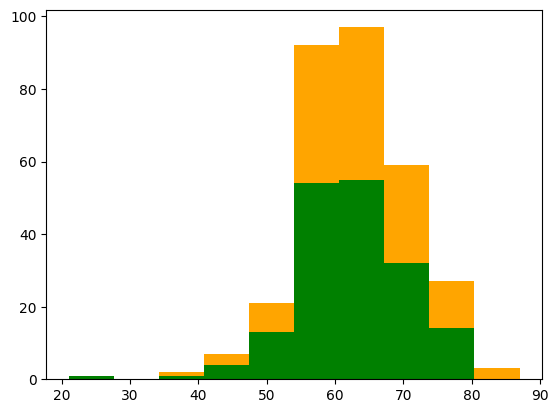

In [ ]:
# Save pieces of information from the histogram.
(n,bins,patches) = plt.hist([lc_age_y1, lc_age_n1], bins = 10, stacked = True, color=['green','orange'])

#create a two-column matrix where each column's entries hold the heights
n_table = np.column_stack((n[0],n[1]))
# each row in n_norm sums to one and cloumns within each row give the proportion fo that variable that makes up the row
n_norm = n_table/n_table.sum(axis=1)[:,None]

# Each row in ourbins gives the upper and lower bound of each bin.

ourbins = np.column_stack((bins[0:10],bins[1:11]))

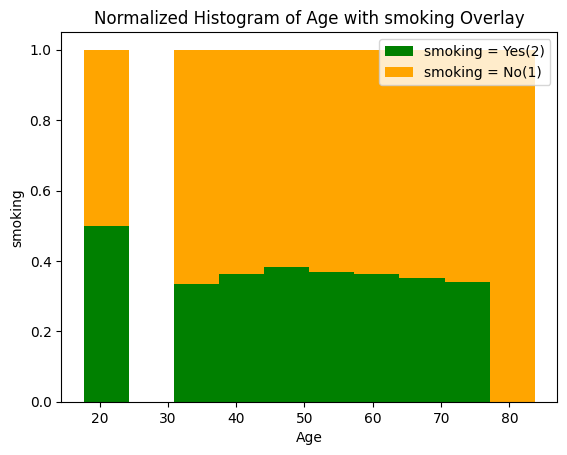

In [ ]:
# plot the normalizedhistogram for the "age" and 'smoking' variables
p1 = plt.bar(ourbins[:,0],n_norm[:,0],width=ourbins[:,1]-ourbins[:,0],color='green')
p2 = plt.bar(ourbins[:,0],n_norm[:,1],width=ourbins[:,1]-ourbins[:,0],color='orange',bottom=n_norm[:,0])
plt.legend((p1[0], p2[0]), ('smoking = Yes(2)', 'smoking = No(1)'))
plt.title('Normalized Histogram of Age with smoking Overlay')
plt.xlabel('Age')
plt.ylabel('smoking')
plt.show()

## Contingency table of Age_binned with Smoking

In [ ]:
# creating a contingency table of age_binned with Smoking
CROSSTAB03 = pd.crosstab(lung_cancer_data['SMOKING'],lung_cancer_data['Age_Binned'])
CROSSTAB03

Age_Binned,Young(less than 45),Middle(45 to 65),Old(above 65)
SMOKING,,,
1,2,83,50
2,3,115,56


In [ ]:
# Contingency table  of age_binned with smoking with column percentages
round(CROSSTAB03.div(CROSSTAB03.sum(0).astype(float), axis=1)*100,3)

Age_Binned,Young(less than 45),Middle(45 to 65),Old(above 65)
SMOKING,,,
1,40.0,41.919,47.17
2,60.0,58.081,52.83


## Histogram of Age with lung_cancer Overlay

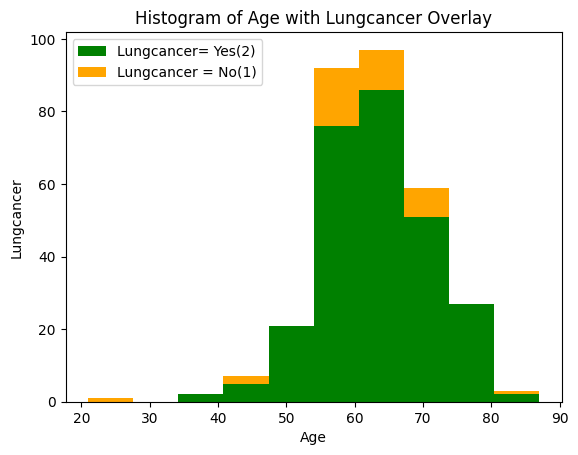

In [ ]:
# Creating histogram of age with lung_cancer overlay
lc_age_y2 = lung_cancer_data[lung_cancer_data.LUNG_CANCER_numeric == 1]['AGE']
lc_age_n2 = lung_cancer_data[lung_cancer_data.LUNG_CANCER_numeric == 0]['AGE']
plt.hist([lc_age_y2, lc_age_n2], bins = 10, stacked = True, color=['green','orange'])
plt.legend(['Lungcancer= Yes(2)', 'Lungcancer = No(1)'])
plt.title('Histogram of Age with Lungcancer Overlay')
plt.xlabel('Age')
plt.ylabel('Lungcancer')
plt.show()


## Normalized Histogram of Age with Lung_Cancer Overlay

<ipython-input-22-be9aec98aa85>:7: RuntimeWarning: invalid value encountered in divide
  n_norm = n_table/n_table.sum(axis=1)[:,None]


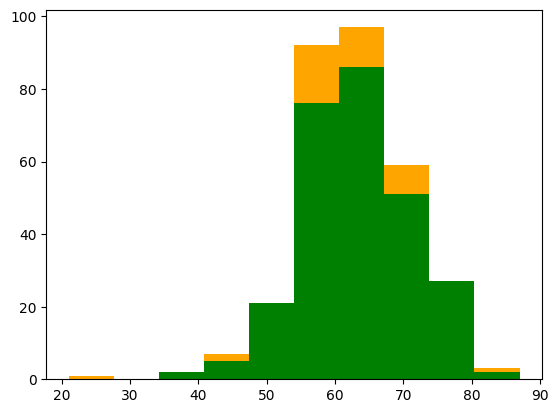

In [ ]:
# Save pieces of information from the histogram.
(n,bins,patches) = plt.hist([lc_age_y2, lc_age_n2], bins = 10, stacked = True, color=['green','orange'])

#create a two-column matrix where each column's entries hold the heights
n_table = np.column_stack((n[0],n[1]))
# each row in n_norm sums to one and cloumns within each row give the proportion fo that variable that makes up the row
n_norm = n_table/n_table.sum(axis=1)[:,None]

# Each row in ourbins gives the upper and lower bound of each bin.

ourbins = np.column_stack((bins[0:10],bins[1:11]))

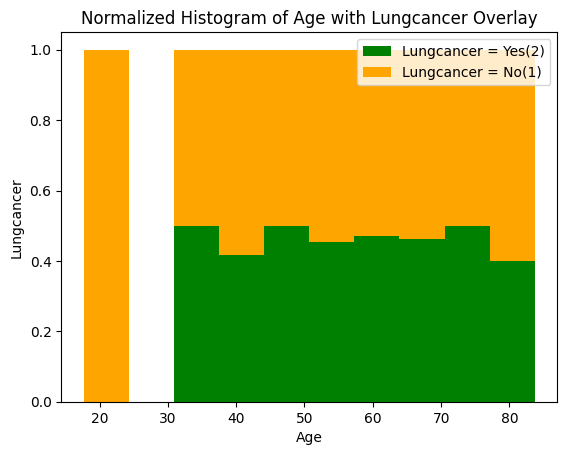

In [ ]:
# plot the normalizedhistogram for the "age" and 'Lungcancer' variables
p1 = plt.bar(ourbins[:,0],n_norm[:,0],width=ourbins[:,1]-ourbins[:,0],color='green')
p2 = plt.bar(ourbins[:,0],n_norm[:,1],width=ourbins[:,1]-ourbins[:,0],color='orange',bottom=n_norm[:,0])
plt.legend((p1[0], p2[0]), ('Lungcancer = Yes(2)', 'Lungcancer = No(1)'))
plt.title('Normalized Histogram of Age with Lungcancer Overlay')
plt.xlabel('Age')
plt.ylabel('Lungcancer')
plt.show()

## Contingency table of Age_binned with Lung_Cancer

In [ ]:
# creating a contingency table of age_binned with Lung_Cancer
CROSSTAB04 = pd.crosstab(lung_cancer_data['LUNG_CANCER_numeric'],lung_cancer_data['Age_Binned'])
CROSSTAB04

Age_Binned,Young(less than 45),Middle(45 to 65),Old(above 65)
LUNG_CANCER_numeric,,,
0,1,28,10
1,4,170,96


In [ ]:
# Contingency table  of age_binned with Lung Cancer with column percentages
round(CROSSTAB04.div(CROSSTAB04.sum(0).astype(float), axis=1)*100,3)

Age_Binned,Young(less than 45),Middle(45 to 65),Old(above 65)
LUNG_CANCER_numeric,,,
0,20.0,14.141,9.434
1,80.0,85.859,90.566


## Histogram of Age with Shortness of Breath Overlay

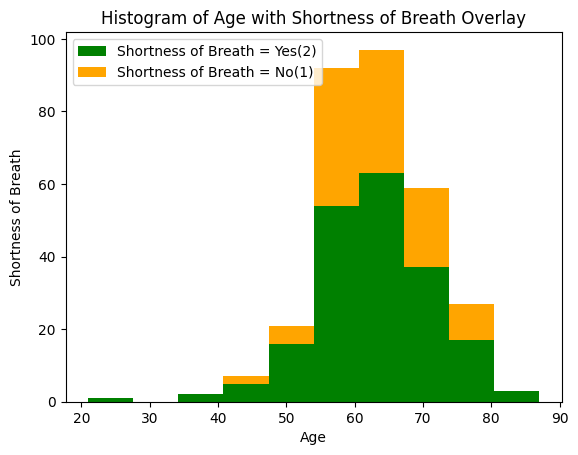

In [ ]:
# Creating histogram of age with sShortness of Breath  overlay
lc_age_y3 = lung_cancer_data[lung_cancer_data["SHORTNESS OF BREATH"] == 2]["AGE"]
lc_age_n3 = lung_cancer_data[lung_cancer_data["SHORTNESS OF BREATH"] == 1]["AGE"]
plt.hist([lc_age_y3, lc_age_n3], bins=10, stacked=True, color=['green','orange'])
plt.legend(['Shortness of Breath = Yes(2)', 'Shortness of Breath = No(1)'])
plt.title('Histogram of Age with Shortness of Breath Overlay')
plt.xlabel('Age')
plt.ylabel('Shortness of Breath')
plt.show()


##

## Normalized Histogram for the "Age" and 'Shortness of Breath'

<ipython-input-27-5fe90b6e846a>:7: RuntimeWarning: invalid value encountered in divide
  n_norm = n_table/n_table.sum(axis=1)[:,None]


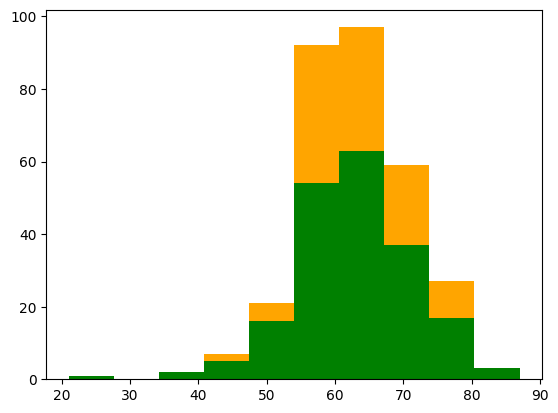

In [ ]:
# Save pieces of information from the histogram.
(n,bins,patches) = plt.hist([lc_age_y3, lc_age_n3], bins = 10, stacked = True, color=['green','orange'])

#create a two-column matrix where each column's entries hold the heights
n_table = np.column_stack((n[0],n[1]))
# each row in n_norm sums to one and cloumns within each row give the proportion fo that variable that makes up the row
n_norm = n_table/n_table.sum(axis=1)[:,None]

# Each row in ourbins gives the upper and lower bound of each bin.

ourbins = np.column_stack((bins[0:10],bins[1:11]))

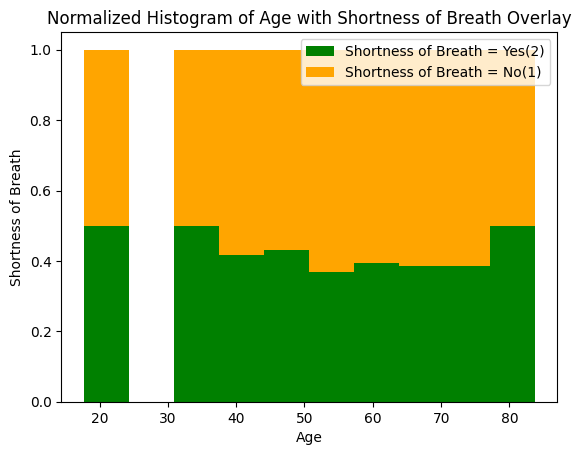

In [ ]:
# plot the normalized histogram for the "age" and 'Shortness of Breath' variables
p1 = plt.bar(ourbins[:,0],n_norm[:,0],width=ourbins[:,1]-ourbins[:,0],color='green')
p2 = plt.bar(ourbins[:,0],n_norm[:,1],width=ourbins[:,1]-ourbins[:,0],color='orange',bottom=n_norm[:,0])
plt.legend((p1[0], p2[0]), ('Shortness of Breath = Yes(2)', 'Shortness of Breath = No(1)'))
plt.title('Normalized Histogram of Age with Shortness of Breath Overlay')
plt.xlabel('Age')
plt.ylabel('Shortness of Breath')
plt.show()

## Contingency table of Age_binned with Shortness of Breath

In [ ]:
# creating a contingency table of age_binned with anxiety
CROSSTAB05 = pd.crosstab(lung_cancer_data['SHORTNESS OF BREATH'],lung_cancer_data['Age_Binned'])
CROSSTAB05

Age_Binned,Young(less than 45),Middle(45 to 65),Old(above 65)
SHORTNESS OF BREATH,,,
1,0,76,35
2,5,122,71


In [ ]:
# Contingency table  of age_binned with Lung Cancer with column percentages
round(CROSSTAB05.div(CROSSTAB05.sum(0).astype(float), axis=1)*100,3)

Age_Binned,Young(less than 45),Middle(45 to 65),Old(above 65)
SHORTNESS OF BREATH,,,
1,0.0,38.384,33.019
2,100.0,61.616,66.981


# Creating Training and Test data sets

In [ ]:
#Import library for training and splitting the data.
from sklearn.model_selection import train_test_split
import random

In [ ]:
# Spliting the data with training data = 75%
lung_cancer_train, lung_cancer_test = train_test_split(lung_cancer_data_numeric, test_size = 0.25, random_state = 42)

In [ ]:
# Checking if the counts are even
lung_cancer_train['LUNG_CANCER_numeric'].value_counts()

LUNG_CANCER_numeric
1    197
0     34
Name: count, dtype: int64

##### Resampling to get an even data set for training the model

In [ ]:
# create variables needed to compute resampled record size
yes_records = lung_cancer_train.loc[lung_cancer_train['LUNG_CANCER_numeric']== 0,].shape[0]
total_records = lung_cancer_train.shape[0]

#determine the portion size to resample
(0.3 * total_records - yes_records) / 0.7

50.42857142857143

In [ ]:
#subset the records to be resampled
to_resample=lung_cancer_train.loc[lung_cancer_train['LUNG_CANCER_numeric']==0]

In [ ]:
#resample the 'yes' records to the determined sample size
our_resample = to_resample.sample(n = 50, replace = True)


In [ ]:
# concatenate the sampled data with the rest of the training data
#so that it's rebalanced
lung_cancer_train_rebal = pd.concat([lung_cancer_train, our_resample])

#### Spliting to X and Y for train and testing dataset

In [ ]:
# Predictor variables for train dataset
X_train = lung_cancer_train_rebal.drop('LUNG_CANCER_numeric', axis = 1)
#Target variable for train dataset
y_train = lung_cancer_train_rebal['LUNG_CANCER_numeric']

# Predictor variables for test dataset
X_test = lung_cancer_test.drop('LUNG_CANCER_numeric', axis = 1)
#Target variable for test dataset
y_test = lung_cancer_test['LUNG_CANCER_numeric']

## MODELING PHASE

### C5.0 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

In [ ]:
#code that runs the C5.0 algorithm
c50_01 = DecisionTreeClassifier(criterion = "entropy", min_samples_split=75,
                                max_leaf_nodes=5).fit(X_train,y_train)

#Do we need a dummy set?

In [ ]:
#predict y with Decision tree
y_pred = c50_01.predict(X_test)

**Model Accuracy**

In [ ]:
# evaluate model accuracy (pick model with a low mse)
import sklearn.metrics as metrics
from sklearn.metrics import r2_score

In [ ]:
# mse
mse_C50 = metrics.mean_squared_error(y_test, y_pred)
mse_C50

0.07692307692307693

In [ ]:
# Mean Absolute Error
mae_C50 = metrics.mean_absolute_error(y_test, y_pred)
mae_C50

0.07692307692307693

In [ ]:
r2_C5 = r2_score(y_test,y_pred)
r2_C5

-0.28219178082191765

In [ ]:
acc_C5 = metrics.accuracy_score(y_test, y_pred)
acc_C5

0.9230769230769231

##### Visualizing the C5.0 Decision Tree

In [ ]:
# Columns
X_names = X_train.columns
y_names = ['No Lung Cancer', 'Lung Cancer']


In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

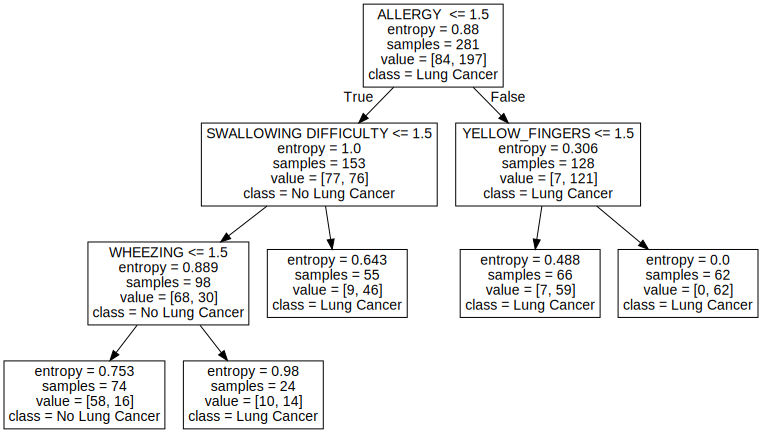

In [ ]:
#export the decision tree of the C5.0 algorithm to Graphviz format
C50_data = export_graphviz(c50_01, out_file = None,
                feature_names=X_names, class_names=y_names)

#create a graph from the Graphviz data
C50_graph = graphviz.Source(C50_data)
C50_graph

### Naive Bayes Classification

In [ ]:
#import MultinomialNB from sklearn.naive_bayes
from sklearn.naive_bayes import MultinomialNB

#run the Naïve Bayes Algorithm
nb_01 = MultinomialNB().fit(X_train,y_train)

#generate predictions for X_test data
Y_predicted = nb_01.predict(X_test)


**Model Accuracy**

In [ ]:
mse_nb = metrics.mean_squared_error(y_test, Y_predicted)
mse_nb

0.0641025641025641

In [ ]:
mae_nb = metrics.mean_absolute_error(y_test, Y_predicted)
mae_nb

0.0641025641025641

In [ ]:
r2_nb = r2_score(y_test,Y_predicted)
r2_nb

-0.06849315068493156

In [ ]:
acc_nb = metrics.accuracy_score(y_test, Y_predicted)
acc_nb

0.9358974358974359

#Multiple Regression Model

In [ ]:
import statsmodels.api as sm

In [ ]:
model01_train = sm.OLS(y_train, X_train).fit()
model01_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     LUNG_CANCER_numeric   R-squared (uncentered):                   0.843
Model:                             OLS   Adj. R-squared (uncentered):              0.834
Method:                  Least Squares   F-statistic:                              95.11
Date:                 Wed, 24 Apr 2024   Prob (F-statistic):                    1.75e-97
Time:                         01:41:33   Log-Likelihood:                         -88.821
No. Observations:                  281   AIC:                                      207.6
Df Residuals:                      266   BIC:                                      262.2
Df Model:                           15                                                  
Covariance Type:             nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
AGE                      -0.0139      0.002     -6.378      0.000      -0.018      -0.010
SMOKING                   0.0200      0.043      0.471      0.638      -0.064       0.104
YELLOW_FINGERS            0.0964      0.054      1.771      0.078      -0.011       0.204
ANXIETY                   0.0231      0.056      0.415      0.679      -0.086       0.133
PEER_PRESSURE             0.0663      0.045      1.462      0.145      -0.023       0.156
CHRONIC DISEASE           0.0776      0.044      1.756      0.080      -0.009       0.165
FATIGUE                   0.1654      0.052      3.170      0.002       0.063       0.268
ALLERGY                   0.2378      0.049      4.888      0.000       0.142       0.334
WHEEZING                  0.0505      0.051      0.980      0.328      -0.051       0.152
ALCOHOL CONSUMING         0.1667      0.055      3.006      0.003       0.058       0.276
COUGHING                  0.1508      0.052      2.901      0.004       0.048       0.253
SHORTNESS OF BREATH      -0.0323      0.052     -0.617      0.538      -0.135       0.071
SWALLOWING DIFFICULTY     0.1721      0.053      3.244      0.001       0.068       0.277
CHEST PAIN               -0.0642      0.046     -1.395      0.164      -0.155       0.026
Gender_Numeric           -0.0620      0.048     -1.283      0.201      -0.157       0.033
==============================================================================
Omnibus:                       11.312   Durbin-Watson:                   1.510
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                7.531
Skew:                          -0.264   Prob(JB):                       0.0232
Kurtosis:                       2.395   Cond. No.                         237.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above model summary
Predictor variables such as anxiety, wheezing and shortness of breath have a very high P value (p-value > α = 0.05) . This tells us that  variables such as anxiety, wheezing and shortness of breath are not statistically significant in predicting whether someone has lung cancer.

[More info on p-values in multiple linear regression](https://sl.bing.net/dFMMZ5s5xg4)

In [ ]:
ypredreg = model01_train.predict(X_test)

**Model Accuracy**

In [ ]:
mse_reg = metrics.mean_squared_error(y_test, ypredreg)
mse_reg

0.09265901828904714

In [ ]:
MAE_Reg = metrics.mean_absolute_error(y_test, ypredreg)
MAE_Reg


0.23251889984641094

In [ ]:
r2_reg = r2_score(y_test,ypredreg)
r2_reg

-0.5444862117001721

In [ ]:
# Converting predicted y values in regression model to int since it was float. In order to find the accuracy metric
ypredreg = ypredreg.astype(int)


In [ ]:
print(y_test.dtype)
print(ypredreg.dtype)


int64
int64


In [ ]:

acc_reg = metrics.accuracy_score(y_test, ypredreg)
acc_reg

0.20512820512820512

### **Key Factors/ Features for Our Best Performing Model**  
(Multinomial Naive Bayes Model with a 93% accuracy)

In [ ]:
# Feature importance for Multinomial Naive Bayes Model
feature_prob = nb_01.feature_log_prob_
#feature_prob = feature_prob.T
feature_prob = feature_prob[1] # for prob likely to give us lung cancer
feature_names02 = X_names
feature_prob


array([-0.30399959, -3.97588238, -3.97269259, -4.01165856, -4.00505787,
       -4.021642  , -3.88435513, -3.95689447, -3.96951293, -3.96951293,
       -3.94753403, -3.92299292, -4.03172612, -3.97908238, -4.05565888])

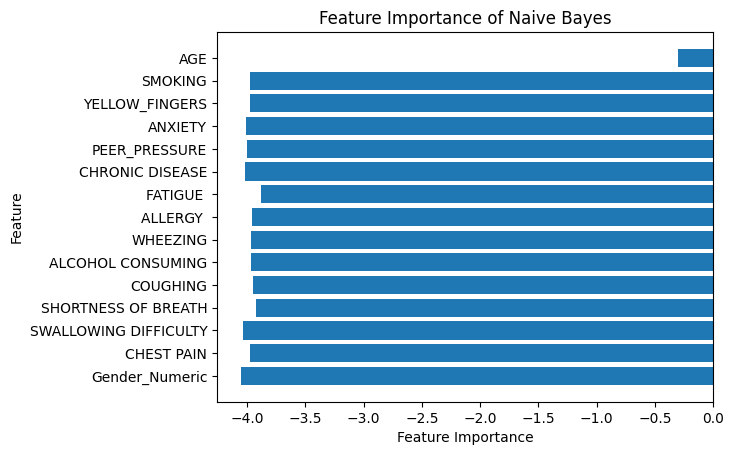

In [ ]:
importances = dict(zip(feature_names02, feature_prob))

# Sorting by Importance
sorted_importances = sorted(importances.items(), key=lambda x: np.argmax(x[1]), reverse=True)

#Unzipping the feature names and their importances
feature_names02, feature_prob = zip(*sorted_importances)

# Reshaping the width argument to match the shape of the height argument
#feature_prob = np.array(feature_prob).reshape(2, 15)

#Plotting the feature importances
plt.barh(feature_names02, feature_prob)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance of Naive Bayes")
plt.gca().invert_yaxis() # Inverting the y-axis to show the most important feature at the top
plt.show()

We can see that the Multinomial Naive Bayes model uses key factors such as:  
Age  
Fatigue  
Shortness of Breath  
Smoking
Peer pressure
Chest Pain
and Yellow Fingers  

Predictors such as Gender, swallowing difficulty and chronic disease were not key features in our prediction




### End of Projet

